<a href="https://colab.research.google.com/github/MishaVertCV/DS/blob/main/task1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Тестовое задание<span class="tocSkip"></span></h1>

<h2>Задание №1 “Распарсить наименование”<span class="tocSkip"></span></h2>

Для начала импортируем необходимые библиотеки для выполнения задания:

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

Теперь прочитаем датасет и выведем его:

In [ ]:
df = pd.read_excel('Отводы.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Наименование  395 non-null    object 
 1   Цена          392 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


,Наименование,Цена
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250.0
1,отвод п 90 219 х6 ст.08-10х17н13м2т / aisi 316...,0.0
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625.0
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188.0
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125.0


В столбце "Цена" есть значения записанные через запятую, нули и просто пропущенные значения. Сначала удалим все нули и пропущенные значения, если их немного:

In [ ]:
df.isna().sum()

Наименование    0
Цена            3
dtype: int64

Всего 3 значения из 395, это можно удалить:

In [ ]:
df = df.dropna().reset_index(drop = True)
df.isna().sum()

Наименование    0
Цена            0
dtype: int64

Теперь посмотрим на количество нулевых значений:

In [ ]:
len(df.query('Цена == 0'))

2

Их тоже мало, поэтому просто удалим:

In [ ]:
df = df.query('Цена != 0')
len(df.query('Цена == 0'))

0

Так как значения с запятой записались как дробные просто посмотрим числа, которые имеют дробную часть:

In [ ]:
df.query('Цена % 1 != 0')

,Наименование,Цена
25,отвод п 45-273х12-10х17н13м2т по ту 1468-001-1...,2.702
26,отвод п 90-273х12-10х17н13м2т по ту 1468-001-1...,4.150
27,отвод п 90-219х12-10х17н13м2т по ту 1468-001-1...,2.515
29,отвод 45-219х12-10х17н13м2т по ту 1468-001-171...,1.635
30,отвод 45-325х14-10х17н13м2т по ту 1468-001-171...,4.165
31,отвод 90-325х14-10х17н13м2т по ту 1468-001-171...,6.405
32,отвод 90-426х12-10х17н13м2т по ту 1468-001-171...,9.638
33,отвод 45-377х10-10х17н13м2т по ту 1468-001-171...,4.126
34,отвод 45-426х12-10х17н13м2т по ту 1468-001-171...,6.266
35,отвод крутоизогнутый материал - 10х17н13м2т 90...,6.339


Все эти отводы имеют большой диаметр и толстые стенки, поэтому целесообразно умножить эти цены на 1000:

In [ ]:
df['Цена'] = df['Цена'].apply(lambda x: x*1000 if (x % 1) != 0 else x)
len(df.query('Цена % 1 != 0'))

0

Так как дробных значений не осталось можно привести их к типу int, чтобы сэкономить память:

In [ ]:
df['Цена'] = df['Цена'].astype(int)
df.dtypes

Наименование    object
Цена             int32
dtype: object

Теперь посмотрим на уникальные наименования во всем датасете, чтобы лучше понимать как лучше разделить информацию по столбцам в новом датасете:

In [ ]:
df['Наименование'].unique()

array(['отвод п 45 219 х10 ст.08-12х18н10т / aisi 321',
       'отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 ту должны быть испытаны на стойкость к мкк методот аму по гост 6032-2017',
       'отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 должны быть испытаны на стойкость к мкк методот аму по гост 6032-2017.',
       'отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с испытанием на мкк по методу аму гост 6032-2017, без содержания алюминия, меди и медьсодержащих сплавов.',
       'отвод 90 57 х4 ст.08-12х18н10т / aisi 321',
       'отвод 45 57 х4 ст.08-12х18н10т / aisi 321',
       'отвод ок 45-32х4-1,5dn-12х18н10т',
       'отвод ок 90-32х4-1,5dn-12х18н10т',
       'отвод ок 90-38х3-1,5dn-12х18н10т',
       'отвод ок 90-45х3-1,5dn-12х18н10т',
       'отвод ок 90-57х4-1,5dn-12х18н10т', 'отвод п90-57х5-12х18н10т',
       'отвод крутоизогнутый бесшовный приварной п90-108х6 из стали 10х17н13м2т по ту 1468-001-17192736-01',
       'отвод крутоизогнутый бесшовный приварной п90-89х5 из стали 10х17н1

Радиус гиба определим по наличию dn в наименовании:

In [ ]:
def rad(row):
    s = row['Наименование']
    match = re.search(r'\ddn', s)
    if match:
        return match.group()
    else:
        return '3D'

df['Радиус_гиба'] = df.apply(rad, axis=1)
df

,Наименование,Цена,Радиус_гиба
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D
...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D
390,отвод нерж. aisi 316 dn 51×3,28,3D


In [ ]:
df['Радиус_гиба'].unique()

array(['3D', '5dn'], dtype=object)

Насчёт угла примерно понятно - есть углы 90, 60, 45, 30 и 15. Не всегда первые 2 цифры - это угол, поэтому использовать тут регулярное варажение re.search(r'\d{2}', string) не стоит. Значения, которые содержат последовательность цифр '90', '60', '45', '30', '15' и при этом не являются углами есть только в таких строках 'отвод 90-45...', 'отвод 90 60...', поэтому просто первое условие поставим на 90 градусов:

In [ ]:
def corner(row):
    s = row['Наименование']
    if '90' in s:
        return 90
    elif '60' in s:
        return 60
    elif '45' in s:
        return 45
    elif '30' in s:
        return 30
    elif '15' in s:
        return 15
    else:
        return '-'

df['Угол'] = df.apply(corner, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90
...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90
390,отвод нерж. aisi 316 dn 51×3,28,3D,-


Посмотрим на пропущенные значения:

In [ ]:
df.query('Угол == "-"')

,Наименование,Цена,Радиус_гиба,Угол
382,"отвод 57*3,5 ст.08-12х18н10т",30,3D,-
390,отвод нерж. aisi 316 dn 51×3,28,3D,-
391,отвод нерж. aisi 316 dn 32×2,18,3D,-


Тут нет информации об угле, поэтому просто оставим пропуски.

Теперь нужно правильно вычленить диаметр из наименования:

In [ ]:
def diam(row):
    s = row['Наименование']
    match1 = re.search(r'\d{1,3} х', s)
    match2 = re.search(r'45-\d{2,3}|90-\d{2,3}|30-\d{2,3}|60-\d{2,3}', s)
    match3 = re.search(r'45 \d{2,3}|90 \d{2}', s)
    match4 = re.search(r'\d{2,3}\*', s)
    match5 = re.search(r'dn \d{2,3}', s)
    match6 = re.search(r'° \d{2,3}', s)
    match7 = re.search(r'д. \d{2,3}', s)
    match8 = re.search(r'отвод \d{2,3}х', s)
    if match1:
        return int(match1.group()[:len(match1.group())-1])
    elif match2:
        return int(match2.group()[3:])
    elif match3:
        return int(match3.group()[3:])
    elif match4:
        return int(match4.group()[:-1])
    elif match5:
        return int(match5.group()[3:])
    elif match6:
        return int(match6.group()[2:])
    elif match7:
        return int(match7.group()[3:])
    elif match8:
        return int(match8.group()[7:-1])
    else:
        return '-'

df['Диаметр'] = df.apply(diam, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57
...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51


Проверим уникальные значения:

In [ ]:
df['Диаметр'].unique()

array([219, 273, 108, 89, 57, 32, 38, 45, 159, 325, 426, 377, 21, 530, 15,
       76, 133, 250, '-', 152, 102, 53, 37, 42, 8, 2, 13, 10, 33, 27, 25,
       5, 1, 406, 508, 355, 610, 711, 914, 73, 82, 168, 51], dtype=object)

Есть пропуски, посмотрим на них:

In [ ]:
df.query('Диаметр == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр
79,отвод крутоизогнутый 90° - 57х4-12х18н10т,41,3D,90,-
118,"отвод 90 lr, 1"""", sch-40s, bw , smls, astm a40...",14,3D,90,-
150,"отвод 90-1-21,3х3,2-12х18н10т",13,3D,90,-
152,отвод 90град 219х6-12х18н10т,634,3D,90,-
153,отвод 90град-273х8-375-ст.12х18н10т,1320,3D,90,-
177,"отвод 90⁰ 32х3,0 12х18н10т",11,3D,90,-
189,"отвод 15-219х6-12х18н10т, гост 17375-2001",396,3D,15,-
341,"отвод п90-1-26,9х3,2-12х18н10т гост 17375-2001",17,3D,90,-
343,"отвод тип а 33,7х2 aisi 316 90 град. en 10253-4",17,3D,90,-
344,"отвод гнутый трубный_90-1-114,3х6,3-12х18н10т ...",683,3D,90,-


Эти строки сложно как-то систематизировать, поэтому просто заполним пропуски:

In [ ]:
df['Диаметр'][79] = 57
df['Диаметр'][150] = 21
df['Диаметр'][152] = 219
df['Диаметр'][153] = 273
df['Диаметр'][177] = 32
df['Диаметр'][189] = 219
df['Диаметр'][341] = 26.9
df['Диаметр'][343] = 33.7
df['Диаметр'][344] = 114

<ipython-input-18-0e45421dd282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Диаметр'][79] = 57
<ipython-input-18-0e45421dd282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Диаметр'][150] = 21
<ipython-input-18-0e45421dd282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Диаметр'][152] = 219
<ipython-input-18-0e45421dd282>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [ ]:
df.query('Диаметр == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр
118,"отвод 90 lr, 1"""", sch-40s, bw , smls, astm a40...",14,3D,90,-


Тут не понятно какой диаметр и в принципе остальные данные тоже не совсем понятно как брать, например толщину стенки, поэтому просто удалим:

In [ ]:
df = df.drop(labels=[118], axis = 0)
df.query('Диаметр == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр


Также изменим тип данных в этом столбце:

In [ ]:
df['Диаметр'] = df['Диаметр'].astype(float)
df.dtypes

Наименование     object
Цена              int32
Радиус_гиба      object
Угол             object
Диаметр         float64
dtype: object

Теперь необходимо определить стенку:

In [ ]:
def wall(row):
    s = row['Наименование']
    match = re.search(r'х\d{1,2}|×\d', s)
    if match:
        return int(match.group()[1:])
    else:
        return '-'

df['Стенка'] = df.apply(wall, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219.0,10
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273.0,6
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108.0,5
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89.0,5
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57.0,4
...,...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57.0,5
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89.0,6
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89.0,5
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51.0,3


In [ ]:
df.query('Стенка == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка


Тут нет пропущенных значений, значит все хорошо. Теперь переходим к обозначению стали:

In [ ]:
def steel(row):
    s = row['Наименование']
    match = re.search(r'12х18н10т|10х17н13м2т|03х17н14м3|aisi 316|03х18н10|sus 316l', s)
    if match:
        return match.group()
    else:
        return '-'

df['Сталь'] = df.apply(steel, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219.0,10,12х18н10т
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273.0,6,12х18н10т
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108.0,5,12х18н10т
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89.0,5,12х18н10т
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57.0,4,12х18н10т
...,...,...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57.0,5,12х18н10т
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89.0,6,12х18н10т
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89.0,5,12х18н10т
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51.0,3,aisi 316


Посмотрим на пропуски:

In [ ]:
df.query('Сталь == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь


Пропусков нет, поэтому идём дальше:

In [ ]:
def analog_steel(row):
    s = row['Сталь']
    match1 = re.search(r'12х18н10т', s)
    match2 = re.search(r'10х17н13м2т|03х17н14м3|aisi 316|03х18н10|sus 316l', s)
    if match1:
        return 321
    elif match2:
        return 316
    else:
        return '-'

df['Аналоговая_сталь'] = df.apply(analog_steel, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь,Аналоговая_сталь
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219.0,10,12х18н10т,321
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273.0,6,12х18н10т,321
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108.0,5,12х18н10т,321
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89.0,5,12х18н10т,321
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57.0,4,12х18н10т,321
...,...,...,...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57.0,5,12х18н10т,321
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89.0,6,12х18н10т,321
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89.0,5,12х18н10т,321
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51.0,3,aisi 316,316


Посмотрим, нет ли здесь пропусков:

In [ ]:
df.query('Аналоговая_сталь == "-"')

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь,Аналоговая_сталь


Теперь перейдём к нормативам:

In [ ]:
def norm(row):
    s = row['Наименование']
    match = re.search(r'гост \d{4,5}-\d{3,4}|ту \d{4}-\d{3}-\d{8}-\d{2}', s)
    if match:
        return match.group()
    else:
        return 'гост 17375-2001'

df['Норматив'] = df.apply(norm, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь,Аналоговая_сталь,Норматив
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219.0,10,12х18н10т,321,гост 17375-2001
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273.0,6,12х18н10т,321,гост 6032-2017
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108.0,5,12х18н10т,321,гост 6032-2017
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89.0,5,12х18н10т,321,гост 6032-2017
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57.0,4,12х18н10т,321,гост 17375-2001
...,...,...,...,...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57.0,5,12х18н10т,321,гост 17375-2001
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89.0,6,12х18н10т,321,гост 17375-2001
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89.0,5,12х18н10т,321,гост 17375-2001
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51.0,3,aisi 316,316,гост 17375-2001


Посмотрим на значения ГОСТа по умолчанию, если не нашлось ничего или этот же ГОСТ:

In [ ]:
df.query('Норматив == "гост 17375-2001"')['Наименование'].head(30)

0         отвод п 45 219 х10 ст.08-12х18н10т / aisi 321
5             отвод 90 57 х4 ст.08-12х18н10т / aisi 321
6             отвод 45 57 х4 ст.08-12х18н10т / aisi 321
7                      отвод ок 45-32х4-1,5dn-12х18н10т
8                      отвод ок 90-32х4-1,5dn-12х18н10т
9                      отвод ок 90-38х3-1,5dn-12х18н10т
10                     отвод ок 90-45х3-1,5dn-12х18н10т
11                     отвод ок 90-57х4-1,5dn-12х18н10т
12                             отвод п90-57х5-12х18н10т
23          отвод 90 89х6-10х17н13м2т по гост17375-2001
36         отвод 90 ду 32*3 ст12х18н10т гост 17375-2001
37         отвод 90 ду 38*3 ст12х18н10т гост 17375-2001
38            отвод п90 219х6-12х18н10т гост 17375-2001
39    отвод п90-530х9-10х17н13м2т гост 17375-2001\nт...
40    отвод п45-530х9-10х17н13м2т гост 17375-2001 те...
41    отвод п90-377х9-10х17н13м2т гост 17375-2001\nт...
42    отвод п90-108х6-10х17н13м2т гост 17375-2001\nт...
45             отвод п90-57х6-12х18н10т гост 173

In [ ]:
df.to_excel(r'C:\Users\verty\Downloads\answer.xlsx')

Похоже на правду, поэтому перейдём к следующему заданию.

<h2>Задание №2 “Определить параметры, влияющие на цену”<span class="tocSkip"></span></h2>

Сначала посмотрим на корреляцию количественных значений с ценой товара:

array([[<AxesSubplot:xlabel='Диаметр', ylabel='Диаметр'>,
        <AxesSubplot:xlabel='Стенка', ylabel='Диаметр'>,
        <AxesSubplot:xlabel='Цена', ylabel='Диаметр'>],
       [<AxesSubplot:xlabel='Диаметр', ylabel='Стенка'>,
        <AxesSubplot:xlabel='Стенка', ylabel='Стенка'>,
        <AxesSubplot:xlabel='Цена', ylabel='Стенка'>],
       [<AxesSubplot:xlabel='Диаметр', ylabel='Цена'>,
        <AxesSubplot:xlabel='Стенка', ylabel='Цена'>,
        <AxesSubplot:xlabel='Цена', ylabel='Цена'>]], dtype=object)

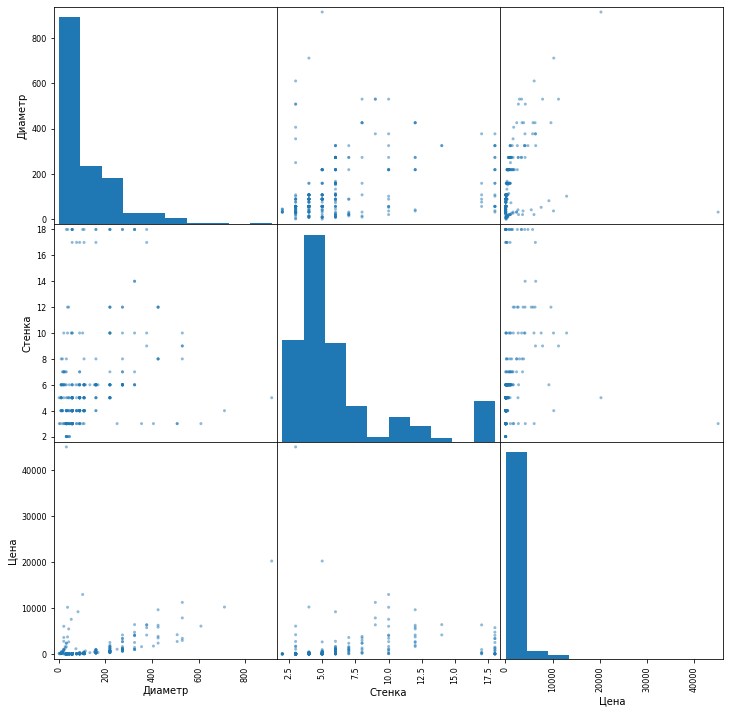

In [ ]:
stat = df.pivot_table(index='Наименование', values=['Цена', 'Диаметр', 'Стенка'])
pd.plotting.scatter_matrix(stat, figsize=(12, 12))

In [ ]:
stat.corr()

,Диаметр,Стенка,Цена
Диаметр,1.000000,0.296277,0.403903
Стенка,0.296277,1.000000,0.187484
Цена,0.403903,0.187484,1.000000


По матрице корреляции можно сказать, что цена обладает прямой, слабой степенью выраженности от диаметра и также коррелирует с толщиной стенки, но уже в меньшей степени. Но этот анализ далёк от полного так как эти 2 параметра в совокупности должны влиять на стоимоть отвода, так как они задают в совокупности с радиусом гиба объём, а следовательно и массу детали.

Теперь посмотрим на связь качественных значений от цены. Сначала посмотрим на гистограмму радиуса гиба и цены:

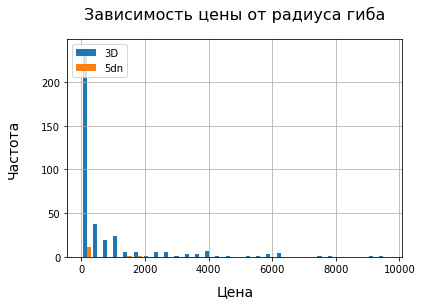

In [ ]:
df_3D = df.query('(Радиус_гиба == "3D") & (Цена < 10000)') # отфильтруем по цене, чтобы более наглядно посмотреть на более распространённый цены
df_5dn = df.query('(Радиус_гиба == "5dn") & (Цена < 10000)')

plt.hist([df_3D['Цена'], df_5dn['Цена']], bins=30, label=['3D', '5dn'])
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Зависимость цены от радиуса гиба', fontsize=16, pad=20)
plt.xlabel('Цена', labelpad=10, fontsize=14)
plt.ylabel('Частота', labelpad=20, fontsize=14)
plt.rc('font', size=12)
plt.show()

На этом графике видно, что самые распространённые отводы для радиуса гиба 5dn стоят чуть больше, чем самые распространённые для радиуса гиба 3D, но какой-то прямой взаимосвязи тут не наблюдантся.

Теперь посмотри на зависимость цены от угла:

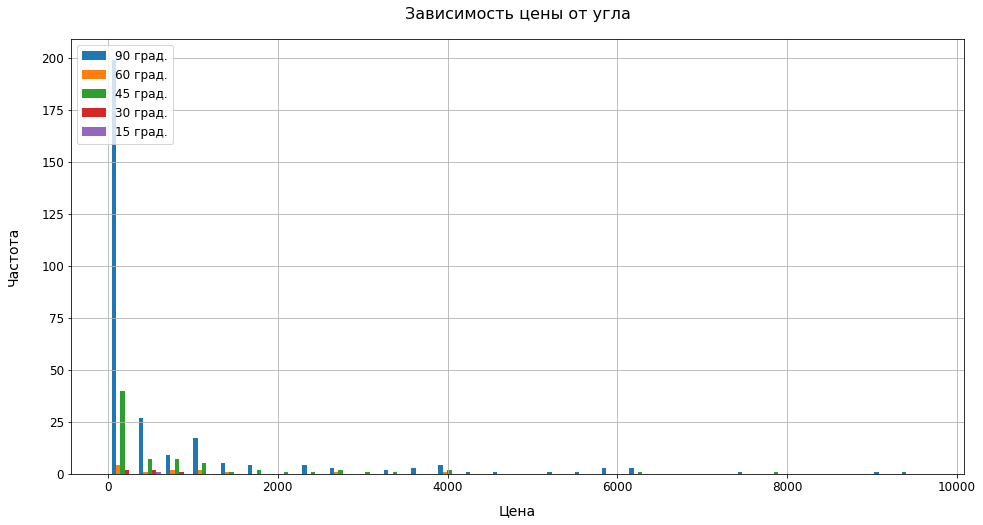

In [ ]:
df_90 = df.query('(Угол == 90) & (Цена < 10000)')
df_60 = df.query('(Угол == 60) & (Цена < 10000)')
df_45 = df.query('(Угол == 45) & (Цена < 10000)')
df_30 = df.query('(Угол == 30) & (Цена < 10000)')
df_15 = df.query('(Угол == 15) & (Цена < 10000)')

plt.figure(figsize=(16,8))
plt.hist([df_90['Цена'], df_60['Цена'], df_45['Цена'], df_30['Цена'], df_15['Цена']], bins=30, label=['90 град.', '60 град.', '45 град.', '30 град.', '15 град.'])
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Зависимость цены от угла', fontsize=16, pad=20)
plt.xlabel('Цена', labelpad=10, fontsize=14)
plt.ylabel('Частота', labelpad=20, fontsize=14)
plt.rc('font', size=12)
plt.show()

Здесь сильно выделяется столбец по 90 град., попробуем ограничить по частоте:

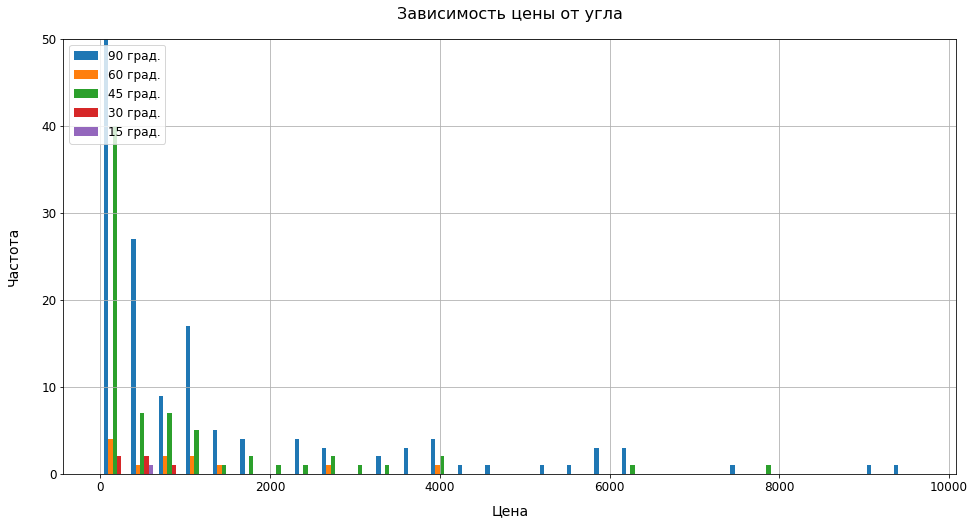

In [ ]:
plt.figure(figsize=(16,8))
plt.ylim(0, 50)
plt.hist([df_90['Цена'], df_60['Цена'], df_45['Цена'], df_30['Цена'], df_15['Цена']], bins=30, label=['90 град.', '60 град.', '45 град.', '30 град.', '15 град.'])
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Зависимость цены от угла', fontsize=16, pad=20)
plt.xlabel('Цена', labelpad=10, fontsize=14)
plt.ylabel('Частота', labelpad=20, fontsize=14)
plt.rc('font', size=12)
plt.show()

Пока сложно что-то сказать, попобуем взять медианные значения до 10000 рублей (исключим "аномальные значения") для каждого угла:

In [ ]:
print('Медианное значение для 90 град.:', df_90['Цена'].median())
print('Медианное значение для 60 град.:', df_60['Цена'].median())
print('Медианное значение для 45 град.:', df_45['Цена'].median())
print('Медианное значение для 30 град.:', df_30['Цена'].median())
print('Медианное значение для 15 град.:', df_15['Цена'].median())

Медианное значение для 90 град.: 123.5
Медианное значение для 60 град.: 866.0
Медианное значение для 45 град.: 250.5
Медианное значение для 30 град.: 363.0
Медианное значение для 15 град.: 396.0


Из медианных значений можно сделать вывод, что самые дорогие отводы в среднем имеют угол изгиба 60 град., на втором месте отводы в 15 град., на 3-ем - 30 град., на 4-ом - 45 град. и на последнем - 90 град. Но это не логично, так как материала в отводе в 90 град. в 2 раза больше, чем в отводе 45 град. Посмотрим на диаметр и стенку для отводов с разными углами:

In [ ]:
print('Медианное значение диаметра и стенки для 90 град.:', df_90['Диаметр'].median(), df_90['Стенка'].median())
print('Медианное значение диаметра и стенки для 60 град.:', df_60['Диаметр'].median(), df_60['Стенка'].median())
print('Медианное значение диаметра и стенки для 45 град.:', df_45['Диаметр'].median(), df_45['Стенка'].median())
print('Медианное значение диаметра и стенки для 30 град.:', df_30['Диаметр'].median(), df_30['Стенка'].median())
print('Медианное значение диаметра и стенки для 15 град.:', df_15['Диаметр'].median(), df_15['Стенка'].median())

Медианное значение диаметра и стенки для 90 град.: 57.0 5.0
Медианное значение диаметра и стенки для 60 град.: 273.0 5.5
Медианное значение диаметра и стенки для 45 град.: 159.0 5.5
Медианное значение диаметра и стенки для 30 град.: 219.0 5.0
Медианное значение диаметра и стенки для 15 град.: 219.0 6.0


По этим значениям видна прямая связь диаметра и стенки и цены, а не угла.

Теперь посмотрим на зависимость цены от типа стали:

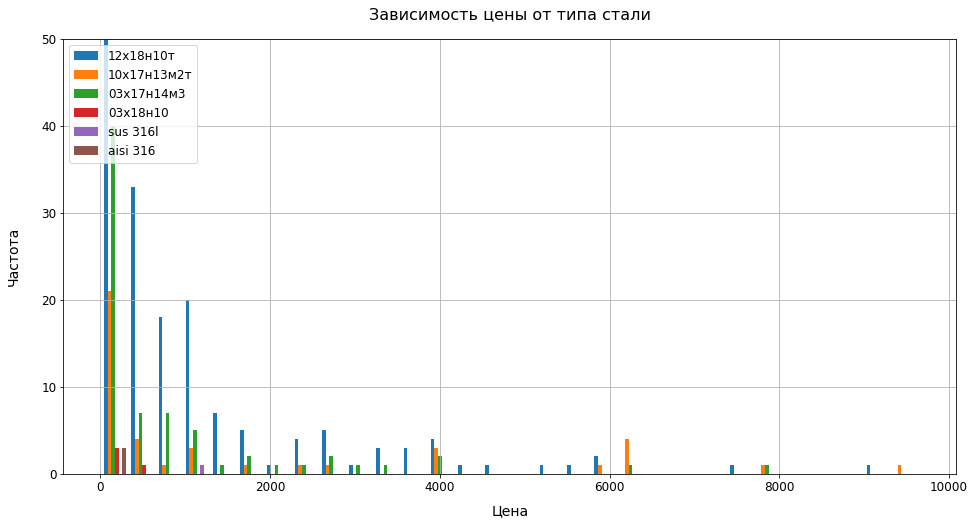

In [ ]:
df_хнт = df.query('(Сталь == "12х18н10т") & (Цена < 10000)')
df_хнмт = df.query('(Сталь == "10х17н13м2т") & (Цена < 10000)')
df_хнм = df.query('(Сталь == "03х17н14м3") & (Цена < 10000)')
df_хн = df.query('(Сталь == "03х18н10") & (Цена < 10000)')
df_sus316l = df.query('(Сталь == "sus 316l") & (Цена < 10000)')
df_aisi316 = df.query('(Сталь == "aisi 316") & (Цена < 10000)')

plt.figure(figsize=(16,8))
plt.ylim(0, 50)
plt.hist([df_хнт['Цена'], df_хнмт['Цена'], df_45['Цена'], df_хнм['Цена'], df_sus316l['Цена'], df_aisi316['Цена']], bins=30, label=['12х18н10т', '10х17н13м2т', '03х17н14м3', '03х18н10', 'sus 316l', 'aisi 316'])
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Зависимость цены от типа стали', fontsize=16, pad=20)
plt.xlabel('Цена', labelpad=10, fontsize=14)
plt.ylabel('Частота', labelpad=20, fontsize=14)
plt.rc('font', size=12)
plt.show()

Тут можно увидеть, что сталь "10х17н13м2т" имеет довольно много значений на ценах выше 6000 рублей, но для более подробного анализа опять же обратимся к медианным значениям:

In [ ]:
print('Медианное значение для стали "12х18н10т":', df_хнт['Цена'].median())
print('Медианное значение для стали "10х17н13м2т":', df_хнмт['Цена'].median())
print('Медианное значение для стали "03х17н14м3":', df_хнм['Цена'].median())
print('Медианное значение для стали "03х18н10":', df_хн['Цена'].median())
print('Медианное значение для стали "sus 316l":', df_sus316l['Цена'].median())
print('Медианное значение для стали "aisi 316":', df_aisi316['Цена'].median())

Медианное значение для стали "12х18н10т": 123.5
Медианное значение для стали "10х17н13м2т": 323.5
Медианное значение для стали "03х17н14м3": 89.0
Медианное значение для стали "03х18н10": 30.0
Медианное значение для стали "sus 316l": 974.0
Медианное значение для стали "aisi 316": 18.0


Самое высокое медианное значение вышло для стали "sus 316l", но отвод с такой сталью только один во всём датафрейме, поэтому сталь с самым высоким медианным значением цены - это "10х17н13м2т", самое мальнькое - для "aisi 316", но возможно это из-за слишком маленькой выборки, так как отводы с такой сталью не видны на гистограмме. Посмотрим на количество отводов из разных марок стали в датафрейме:

In [ ]:
df['Сталь'].value_counts()

12х18н10т      335
10х17н13м2т     45
03х17н14м3       4
aisi 316         3
sus 316l         1
03х18н10         1
Name: Сталь, dtype: int64

Из этого можно только сделать вывод, что сталь "10х17н13м2т" имеет большее медианное значение по цене, чем сталь "12х18н10т", но возможно на это влияют и другие факторы.

Теперь посмотрим на зависимость цены от аналоговой стали:

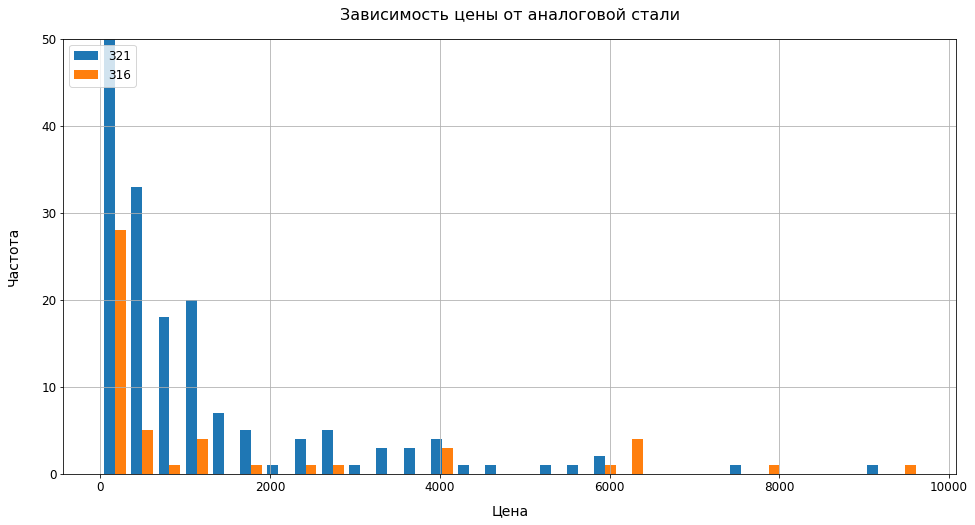

In [ ]:
df_321 = df.query('(Аналоговая_сталь == 321) & (Цена < 10000)')
df_316 = df.query('(Аналоговая_сталь == 316) & (Цена < 10000)')

plt.figure(figsize=(16,8))
plt.ylim(0, 50)
plt.hist([df_321['Цена'], df_316['Цена']], bins=30, label=['321', '316'])
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Зависимость цены от аналоговой стали', fontsize=16, pad=20)
plt.xlabel('Цена', labelpad=10, fontsize=14)
plt.ylabel('Частота', labelpad=20, fontsize=14)
plt.rc('font', size=12)
plt.show()

По данному распределению заметно, что в среднем 316 аналоговая сталь имеет большую цену, проверим по медиане:

In [ ]:
print('Медианное значение для аналоговой стали 321:', df_321['Цена'].median())
print('Медианное значение для аналоговой стали 316:', df_316['Цена'].median())

Медианное значение для аналоговой стали 321: 123.5
Медианное значение для аналоговой стали 316: 314.0


Утверждение выше подтвердилось.

На мой взгляд смотреть зависимость цены от ГОСТа не стоит, так как это общий стандарт для многих деталей.

Проведём оценку по весу детали, это можно вычислить умножив объём детали на плотность стали (примерно 7.9 г/см^3), напишем формулу в зависимости от угла отвода:

In [ ]:
df['Наименование'].unique()

array(['отвод п 45 219 х10 ст.08-12х18н10т / aisi 321',
       'отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 ту должны быть испытаны на стойкость к мкк методот аму по гост 6032-2017',
       'отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 должны быть испытаны на стойкость к мкк методот аму по гост 6032-2017.',
       'отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с испытанием на мкк по методу аму гост 6032-2017, без содержания алюминия, меди и медьсодержащих сплавов.',
       'отвод 90 57 х4 ст.08-12х18н10т / aisi 321',
       'отвод 45 57 х4 ст.08-12х18н10т / aisi 321',
       'отвод ок 45-32х4-1,5dn-12х18н10т',
       'отвод ок 90-32х4-1,5dn-12х18н10т',
       'отвод ок 90-38х3-1,5dn-12х18н10т',
       'отвод ок 90-45х3-1,5dn-12х18н10т',
       'отвод ок 90-57х4-1,5dn-12х18н10т', 'отвод п90-57х5-12х18н10т',
       'отвод крутоизогнутый бесшовный приварной п90-108х6 из стали 10х17н13м2т по ту 1468-001-17192736-01',
       'отвод крутоизогнутый бесшовный приварной п90-89х5 из стали 10х17н1

In [ ]:
def weight(row):
    diam = row['Диаметр']
    wall = row['Стенка']
    corner = row['Угол']
    rad = row['Радиус_гиба']
    x1 = 3 * diam * (np.pi/4) * ((diam/2)**2 - (diam/2 - wall)**2) * np.pi * (7.9 / 1000)
    if rad == '5dn':
        x = (5/1.5) * x1
    else:
        x = x1
    if corner == 90:
        return round(x)
    elif corner == 45:
        return round(x/2)
    elif corner == 60:
        return round(x * (2/3))
    elif corner == 30:
        return round(x/3)
    elif corner == 15:
        return round(x/6)
    else:
        return '-'

df['Масса'] = df.apply(weight, axis=1)
df

,Наименование,Цена,Радиус_гиба,Угол,Диаметр,Стенка,Сталь,Аналоговая_сталь,Норматив,Масса
0,отвод п 45 219 х10 ст.08-12х18н10т / aisi 321,1250,3D,45,219.0,10,12х18н10т,321,гост 17375-2001,13383
2,отвод п 90 273 х6 ст.08-12х18н10т / aisi 321 т...,1625,3D,90,273.0,6,12х18н10т,321,гост 6032-2017,25575
3,отвод п 90 108 х5 ст.08-12х18н10т / aisi 321 д...,188,3D,90,108.0,5,12х18н10т,321,гост 6032-2017,3253
4,отвод п 90 89 х5 ст.08-12х18н10т / aisi 321 с ...,125,3D,90,89.0,5,12х18н10т,321,гост 6032-2017,2186
5,отвод 90 57 х4 ст.08-12х18н10т / aisi 321,50,3D,90,57.0,4,12х18н10т,321,гост 17375-2001,707
...,...,...,...,...,...,...,...,...,...,...
387,отвод 90 57х5-12х18н10т;,35,3D,90,57.0,5,12х18н10т,321,гост 17375-2001,867
388,отвод крутоизогнутый п 90 89х6-12х18н10т;,100,3D,90,89.0,6,12х18н10т,321,гост 17375-2001,2592
389,отвод 90-89х5-12х18н10т гост 17375-2001,86,3D,90,89.0,5,12х18н10т,321,гост 17375-2001,2186
390,отвод нерж. aisi 316 dn 51×3,28,3D,-,51.0,3,aisi 316,316,гост 17375-2001,-


Теперь попробуем посмотреть на корреляцию цены и веса отвода, предварительно очистив датасет от пропусков в столбце с массой:

In [ ]:
new_df = df.query('Масса != "-"')
new_df['Масса'] = new_df['Масса'].astype(int)
new_df.dtypes

<ipython-input-45-d58ade045614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Масса'] = new_df['Масса'].astype(int)


Наименование         object
Цена                  int32
Радиус_гиба          object
Угол                 object
Диаметр             float64
Стенка                int64
Сталь                object
Аналоговая_сталь      int64
Норматив             object
Масса                 int32
dtype: object

array([[<AxesSubplot:xlabel='Масса', ylabel='Масса'>,
        <AxesSubplot:xlabel='Цена', ylabel='Масса'>],
       [<AxesSubplot:xlabel='Масса', ylabel='Цена'>,
        <AxesSubplot:xlabel='Цена', ylabel='Цена'>]], dtype=object)

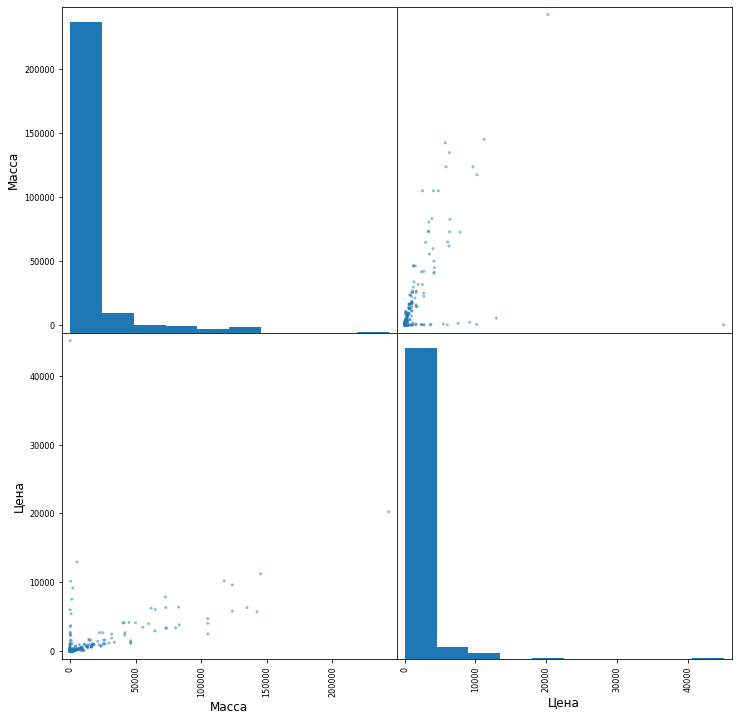

In [ ]:
stat = new_df.pivot_table(index='Наименование', values=['Цена', 'Масса'])
pd.plotting.scatter_matrix(stat, figsize=(12, 12))

In [ ]:
stat.corr()

,Масса,Цена
Масса,1.000000,0.495726
Цена,0.495726,1.000000


Здесь корреляция выше, чем у диаметра и стенки, что показывает зависимость цены от массы отвода.

<h3>Вывод<span class="tocSkip"></span></h3>

- Цена обладает прямой, слабой степенью выраженности от диаметра  
- Цена обладает прямой, средней степенью выраженности от массы отвода
- Сталь "10х17н13м2т" имеет большее медианное значение по цене, чем сталь "12х18н10т", но возможно на это влияют и другие факторы.
- В среднем 316 аналоговая сталь имеет большую цену, чем 321

<h2>Задание №3 "Написать простейший калькулятор"<span class="tocSkip"></span></h2>

Разобьём весь датафренйм на валидационную, тестовую и обучающую выборки:

In [ ]:
df1 = new_df[['Радиус_гиба', 'Угол', 'Сталь', 'Аналоговая_сталь', 'Норматив']]
df1 = pd.get_dummies(df1, drop_first=True)
df = new_df.merge(df1, how='inner')
df = df.drop(['Наименование', 'Радиус_гиба', 'Угол', 'Сталь', 'Аналоговая_сталь', 'Норматив'], axis=1)

df_train, df_test1 = train_test_split(df, test_size=0.4, shuffle=True, random_state=12345)
df_test, df_valid = train_test_split(df_test1, test_size=0.5, shuffle=True, random_state=12345)

features_train = df_train.drop(['Цена'], axis=1)
target_train = df_train['Цена']
features_valid = df_valid.drop(['Цена'], axis=1)
target_valid = df_valid['Цена']
features_test = df_test.drop(['Цена'], axis=1)
target_test = df_test['Цена']

Так как стоит задача определять цену с определённой точностью, то надо минимизировать метрику r2_score (т. е. среднеквадратичное отклонение). Сначала начнём с модели "линейная регрессия":

In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке

result = mean_squared_error(target_valid, predictions_valid) ** 0.5 # RMSE
result = float('{:.2f}'.format(result)) # также округлим
print("RMSE модели линейной регрессии на валидационной выборке:", result

RMSE модели линейной регрессии на валидационной выборке: 1568.34


Так как цены на отводы могут измеряться в десятках юаней, то ошибка в 1568 юаня довольно высокая. Теперь проверим модель "случайный лес", меняя гиперпараметры:

In [ ]:
min_result = 10000 # Поставим минимум на высокий результат
for depth in range(1, 51, 10):
    for est in range(1, 31, 10):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        result = mean_squared_error(target_valid, predictions_valid) ** 0.5
        if result < min_result:
            min_result = result
            best_est = est
            best_depth = depth
min_result = float('{:.2f}'.format(min_result))
print('RMSE модели "случайный лес" на валидационной выборке при гиперпараметрах n_estimators =', best_est, 'max_depth =', best_depth, ':', min_result)

RMSE модели "дерево решений" на валидационной выборке при гиперпараметрах n_estimators = 1 max_depth = 1 : 1568.34


RMSE не изменилось, поэтому пока выигрывает линейная регрессия, потому что она быстрее работает. Теперь посмотрим на модель "дерево решений":

In [ ]:
min_result = 10000
for depth in range(1, 51, 10):
    for split in range(2, 32, 10):
        model = tree.DecisionTreeRegressor(min_samples_split=split, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        result = mean_squared_error(target_valid, predictions_valid) ** 0.5
        if result < min_result:
            min_result = result
            best_split = split
            best_depth = depth
min_result = float('{:.2f}'.format(min_result))
print('RMSE модели "дерево решений" на валидационной выборке при гиперпараметрах min_samples_split =', best_split, 'max_depth =', best_depth, ':', min_result)

RMSE модели "дерево решений" на валидационной выборке при гиперпараметрах min_samples_split = 2 max_depth = 1 : 1568.34


RMSE также не поменялась, поэтому для тестовой выборки выберем линейную регрессию, так как она быстрее, чем остальные модели.

<h3>Конечная RMSE на тестовой выборке<span class="tocSkip"></span></h3>

In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test) # предсказания модели на валидационной выборке

result = mean_squared_error(target_test, predictions_test) ** 0.5 # RMSE
result = float('{:.2f}'.format(result)) # также округлим
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 1415.01


Конечная ошибка предсказания стоимости равна 1415 юаням.